# Energy Efficiency Dataset - Exploratory Data Analysis

## Table of Contents
- [Data Description](#Data-Description)
- [Feature Description](#Feature-Description)
- [Data Profiling](#Data-Profiling)
- [Target and Feature Dependency Analysis](#Target-and-Feature-Dependency-Analysis)
- [Data Analysis](#Data-Analysis)
- [Analysis Conclusions](#Analysis-Conclusions)

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## Load Dataset

In [5]:
df =  pd.read_csv("../../data/raw_data/csv/energy-efficiency-data.csv")

print(f"Dataset shape: {df.shape}")
df.head(10)

Dataset shape: (768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


---
# Data Description

## Basic Information

In [12]:
print("Dataset Information:")
print("=" * 80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [13]:
print("Dataset Shape:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset Shape:
Number of rows: 768
Number of columns: 10


In [14]:
print("Column Names:")
print(df.columns.tolist())

Column Names:
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']


In [15]:
print("Data Types:")
print(df.dtypes)

Data Types:
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object


## Statistical Summary

### Standard Statistical Summary (Numerical Treatment)
Note: X6 (orientation), X7 (glazing_area), X8 (glazing_area_distribution) 
are categorical/ordinal variables that come pre-encoded as numbers in the dataset.

In [16]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Comprehensive Statistical Summary (Proper Treatment)
Includes categorical feature statistics (unique, top, freq) for X6, X7, X8

In [17]:
print("Extended Statistical Summary:")
df.describe(include='all').T

Extended Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


## Missing Values Analysis

In [18]:
print("Missing Values Count:")
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Count:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [19]:
plt.figure(figsize=(12, 6))
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]
if len(missing_percent) > 0:
    missing_percent.plot(kind='bar', color='coral')
    plt.title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Missing Percentage', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset")

No missing values found in the dataset


<Figure size 1200x600 with 0 Axes>

## Duplicate Values Analysis

In [20]:
print("Duplicate Rows Analysis:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicate rows: {(duplicates/len(df)*100):.2f}%")

Duplicate Rows Analysis:
Number of duplicate rows: 0
Percentage of duplicate rows: 0.00%


---
# Feature Description

## Feature Definitions

The dataset contains **8 input features** and **2 target variables**:

### Input Features:
- **X1**: Relative Compactness
- **X2**: Surface Area (m²)
- **X3**: Wall Area (m²)
- **X4**: Roof Area (m²)
- **X5**: Overall Height (m)
- **X6**: Orientation (2: North, 3: East, 4: South, 5: West)
- **X7**: Glazing Area (0%, 10%, 25%, 40% of floor area)
- **X8**: Glazing Area Distribution (1: Uniform, 2: North, 3: East, 4: South, 5: West)

### Target Variables:
- **Y1**: Heating Load (kWh/m²)
- **Y2**: Cooling Load (kWh/m²)

## Feature Categories

In [21]:
numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
categorical_features = ['X6', 'X8']
target_features = ['Y1', 'Y2']

print("Feature Categories:")
print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")
print(f"Target Features: {target_features}")

Feature Categories:
Numerical Features: ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
Categorical Features: ['X6', 'X8']
Target Features: ['Y1', 'Y2']


## Unique Values Analysis

In [22]:
print("Unique Values per Feature:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique Values per Feature:
X1: 12 unique values
X2: 12 unique values
X3: 7 unique values
X4: 4 unique values
X5: 2 unique values
X6: 4 unique values
X7: 4 unique values
X8: 6 unique values
Y1: 586 unique values
Y2: 636 unique values


In [23]:
print("\nCategorical Feature Value Counts:")
for col in categorical_features:
    print(f"\n{col}:")
    print(df[col].value_counts().sort_index())


Categorical Feature Value Counts:

X6:
X6
2    192
3    192
4    192
5    192
Name: count, dtype: int64

X8:
X8
0     48
1    144
2    144
3    144
4    144
5    144
Name: count, dtype: int64


# Group-by Analysis for Discrete Features

## 1. Analyze X6 (Orientation)

In [6]:
x6_analysis = df.groupby('X6')[['Y1', 'Y2']].mean().reset_index()
x6_analysis.columns = ['Orientation (X6)', 'Avg Heating Load (Y1)', 'Avg Cooling Load (Y2)']
print("--- Average Loads by Orientation (X6) ---")
print(x6_analysis)
print("\n")

--- Average Loads by Orientation (X6) ---
   Orientation (X6)  Avg Heating Load (Y1)  Avg Cooling Load (Y2)
0                 2              22.312865              24.604531
1                 3              22.380677              24.312552
2                 4              22.259896              24.480313
3                 5              22.275365              24.953646




## 2. Analyze X8 (Glazing Distribution)

In [7]:
x8_analysis = df.groupby('X8')[['Y1', 'Y2']].mean().reset_index()
x8_analysis.columns = ['Glazing Dist. (X8)', 'Avg Heating Load (Y1)', 'Avg Cooling Load (Y2)']
print("--- Average Loads by Glazing Distribution (X8) ---")
print(x8_analysis)

--- Average Loads by Glazing Distribution (X8) ---
   Glazing Dist. (X8)  Avg Heating Load (Y1)  Avg Cooling Load (Y2)
0                   0              14.286458              19.706250
1                   1              23.026111              25.179514
2                   2              22.934444              24.996875
3                   3              22.681458              24.659444
4                   4              22.886667              25.015139
5                   5              22.680903              24.715000


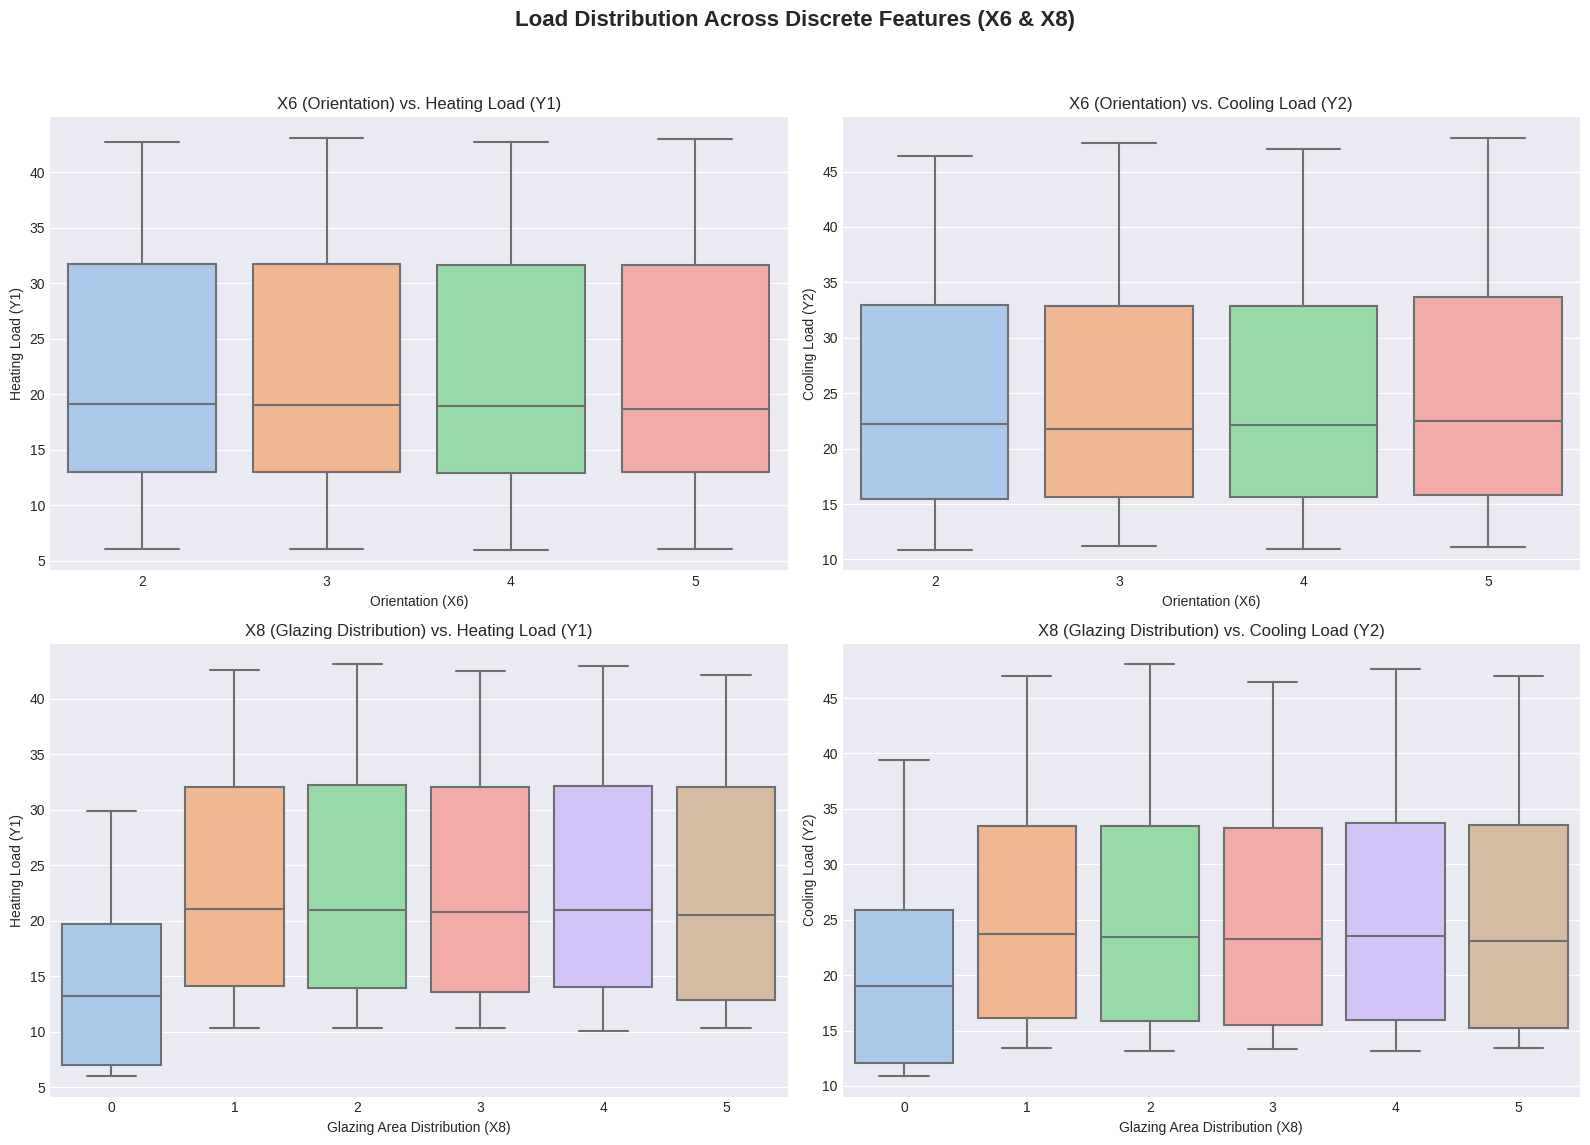

In [8]:
# Box Plots for X6 and X8 against Y1 and Y2

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.suptitle('Load Distribution Across Discrete Features (X6 & X8)', fontsize=16, fontweight='bold')

# X6 vs Y1
sns.boxplot(x='X6', y='Y1', data=df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('X6 (Orientation) vs. Heating Load (Y1)')
axes[0, 0].set_xlabel('Orientation (X6)')
axes[0, 0].set_ylabel('Heating Load (Y1)')

# X6 vs Y2
sns.boxplot(x='X6', y='Y2', data=df, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('X6 (Orientation) vs. Cooling Load (Y2)')
axes[0, 1].set_xlabel('Orientation (X6)')
axes[0, 1].set_ylabel('Cooling Load (Y2)')

# X8 vs Y1
sns.boxplot(x='X8', y='Y1', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('X8 (Glazing Distribution) vs. Heating Load (Y1)')
axes[1, 0].set_xlabel('Glazing Area Distribution (X8)')
axes[1, 0].set_ylabel('Heating Load (Y1)')

# X8 vs Y2
sns.boxplot(x='X8', y='Y2', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('X8 (Glazing Distribution) vs. Cooling Load (Y2)')
axes[1, 1].set_xlabel('Glazing Area Distribution (X8)')
axes[1, 1].set_ylabel('Cooling Load (Y2)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---
# Data Profiling

## Comprehensive Data Profiling

This section provides detailed profiling of the dataset including:
- Summary statistics
- Distribution analysis
- Correlation patterns
- Data quality metrics

In [24]:
def generate_data_profile(df):
    print("="*80)
    print("COMPREHENSIVE DATA PROFILE")
    print("="*80)
    
    print("\n1. DATASET OVERVIEW")
    print("-"*80)
    print(f"Number of observations: {df.shape[0]}")
    print(f"Number of variables: {df.shape[1]}")
    print(f"Total cells: {df.shape[0] * df.shape[1]}")
    print(f"Missing cells: {df.isnull().sum().sum()}")
    print(f"Missing cells percentage: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")
    print(f"Duplicate rows: {df.duplicated().sum()}")
    print(f"Duplicate rows percentage: {(df.duplicated().sum() / df.shape[0] * 100):.2f}%")
    
    print("\n2. VARIABLE TYPES")
    print("-"*80)
    print(df.dtypes.value_counts())
    
    print("\n3. STATISTICAL SUMMARY")
    print("-"*80)
    summary_stats = pd.DataFrame({
        'count': df.count(),
        'mean': df.mean(),
        'std': df.std(),
        'min': df.min(),
        '25%': df.quantile(0.25),
        '50%': df.quantile(0.50),
        '75%': df.quantile(0.75),
        'max': df.max(),
        'skewness': df.skew(),
        'kurtosis': df.kurtosis()
    })
    return summary_stats

profile_summary = generate_data_profile(df)
profile_summary

COMPREHENSIVE DATA PROFILE

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Number of observations: 768
Number of variables: 10
Total cells: 7680
Missing cells: 0
Missing cells percentage: 0.00%
Duplicate rows: 0
Duplicate rows percentage: 0.00%

2. VARIABLE TYPES
--------------------------------------------------------------------------------
float64    8
int64      2
Name: count, dtype: int64

3. STATISTICAL SUMMARY
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
X1,768,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98,0.495513,-0.706568
X2,768,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50,-0.125131,-1.059454
X3,768,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50,0.533417,0.116593
X4,768,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50,-0.162764,-1.776947
X5,768,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00,0.000000,-2.005229
X6,768,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00,0.000000,-1.361042
X7,768,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40,-0.060254,-1.327629
X8,768,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00,-0.088689,-1.148709
Y1,768,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10,0.360449,-1.245572
Y2,768,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03,0.395992,-1.147190


In [ ]:
print("\n4. UNIQUE VALUES PER FEATURE")
print("-"*80)
unique_counts = pd.DataFrame({
    'Unique Values': df.nunique(),
    'Unique %': (df.nunique() / len(df) * 100).round(2)
})
print(unique_counts)

In [ ]:
print("\n5. MEMORY USAGE")
print("-"*80)
memory_usage = df.memory_usage(deep=True)
print(f"Total memory usage: {memory_usage.sum() / 1024:.2f} KB")
print("\nMemory usage per column:")
print(memory_usage)

## Visual Data Profiling

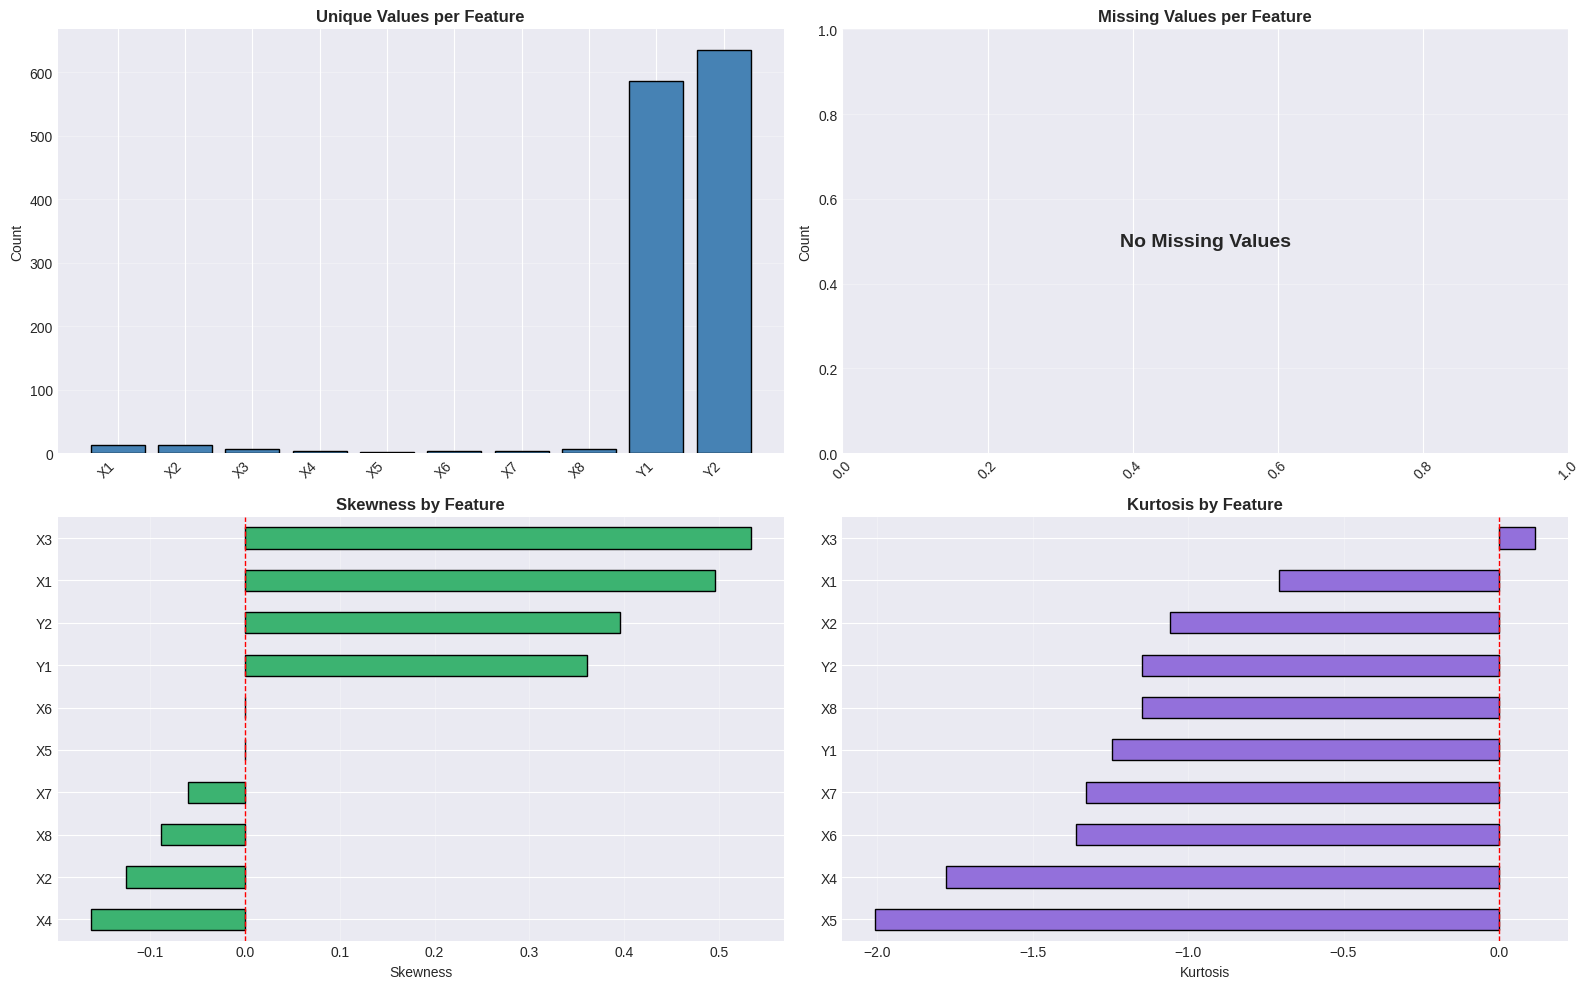

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].bar(range(len(df.columns)), df.nunique(), color='steelblue', edgecolor='black')
axes[0, 0].set_xticks(range(len(df.columns)))
axes[0, 0].set_xticklabels(df.columns, rotation=45, ha='right')
axes[0, 0].set_title('Unique Values per Feature', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    axes[0, 1].bar(missing_data.index, missing_data.values, color='coral', edgecolor='black')
    axes[0, 1].set_title('Missing Values per Feature', fontsize=12, fontweight='bold')
else:
    axes[0, 1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, fontweight='bold')
    axes[0, 1].set_title('Missing Values per Feature', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

skewness = df.skew().sort_values()
skewness.plot(kind='barh', ax=axes[1, 0], color='mediumseagreen', edgecolor='black')
axes[1, 0].set_title('Skewness by Feature', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Skewness')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=1)
axes[1, 0].grid(axis='x', alpha=0.3)

kurt = df.kurtosis().sort_values()
kurt.plot(kind='barh', ax=axes[1, 1], color='mediumpurple', edgecolor='black')
axes[1, 1].set_title('Kurtosis by Feature', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Kurtosis')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=1)
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

---
# Target and Feature Dependency Analysis

## Target Variable Distribution

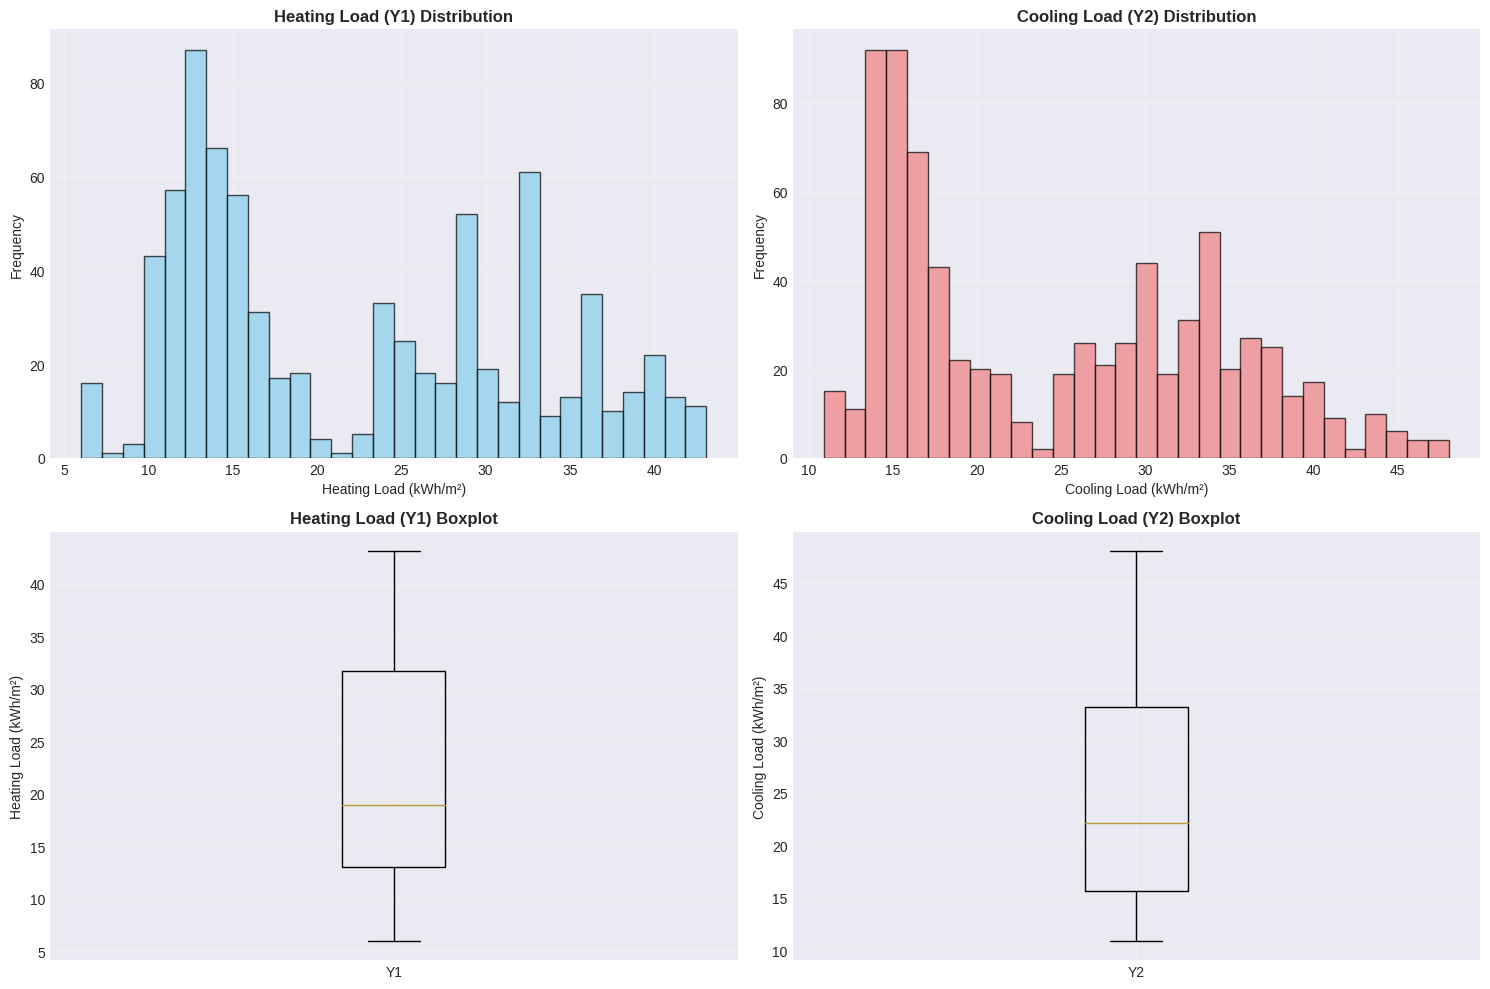

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['Y1'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Heating Load (Y1) Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Heating Load (kWh/m²)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(df['Y2'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Cooling Load (Y2) Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Cooling Load (kWh/m²)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].boxplot([df['Y1']], labels=['Y1'])
axes[1, 0].set_title('Heating Load (Y1) Boxplot', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Heating Load (kWh/m²)')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].boxplot([df['Y2']], labels=['Y2'])
axes[1, 1].set_title('Cooling Load (Y2) Boxplot', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Cooling Load (kWh/m²)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("Target Variable Statistics:")
print("\nHeating Load (Y1):")
print(df['Y1'].describe())
print(f"Skewness: {df['Y1'].skew():.4f}")
print(f"Kurtosis: {df['Y1'].kurtosis():.4f}")

print("\nCooling Load (Y2):")
print(df['Y2'].describe())
print(f"Skewness: {df['Y2'].skew():.4f}")
print(f"Kurtosis: {df['Y2'].kurtosis():.4f}")

Target Variable Statistics:

Heating Load (Y1):
count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Y1, dtype: float64
Skewness: 0.3604
Kurtosis: -1.2456

Cooling Load (Y2):
count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Y2, dtype: float64
Skewness: 0.3960
Kurtosis: -1.1472


## Correlation Analysis

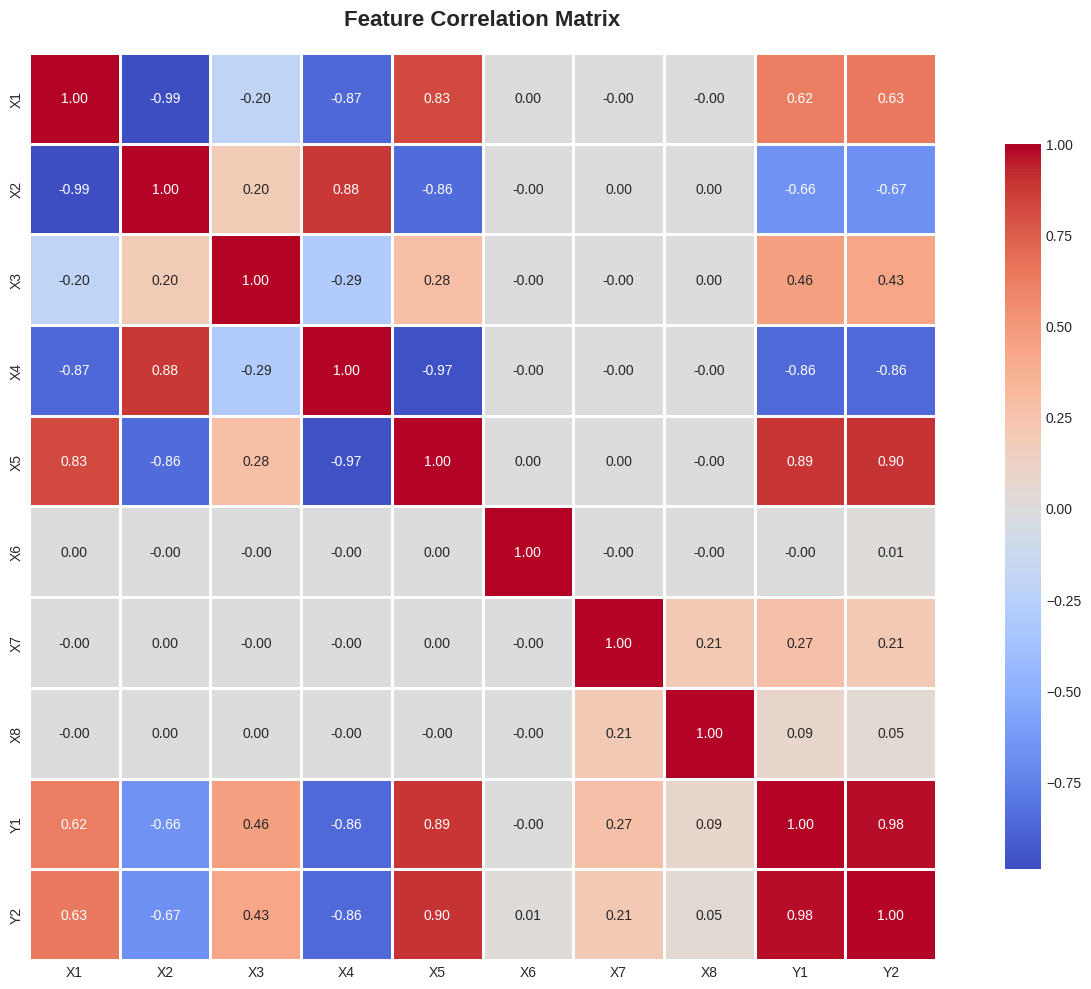

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [11]:
print("Correlation with Target Variables:")
print("\nCorrelation with Heating Load (Y1):")
print(correlation_matrix['Y1'].sort_values(ascending=False))

print("\nCorrelation with Cooling Load (Y2):")
print(correlation_matrix['Y2'].sort_values(ascending=False))

Correlation with Target Variables:

Correlation with Heating Load (Y1):
Y1    1.000000
Y2    0.975862
X5    0.889431
X1    0.622272
X3    0.455671
X7    0.269841
X8    0.087368
X6   -0.002587
X2   -0.658120
X4   -0.861828
Name: Y1, dtype: float64

Correlation with Cooling Load (Y2):
Y2    1.000000
Y1    0.975862
X5    0.895785
X1    0.634339
X3    0.427117
X7    0.207505
X8    0.050525
X6    0.014290
X2   -0.672999
X4   -0.862547
Name: Y2, dtype: float64


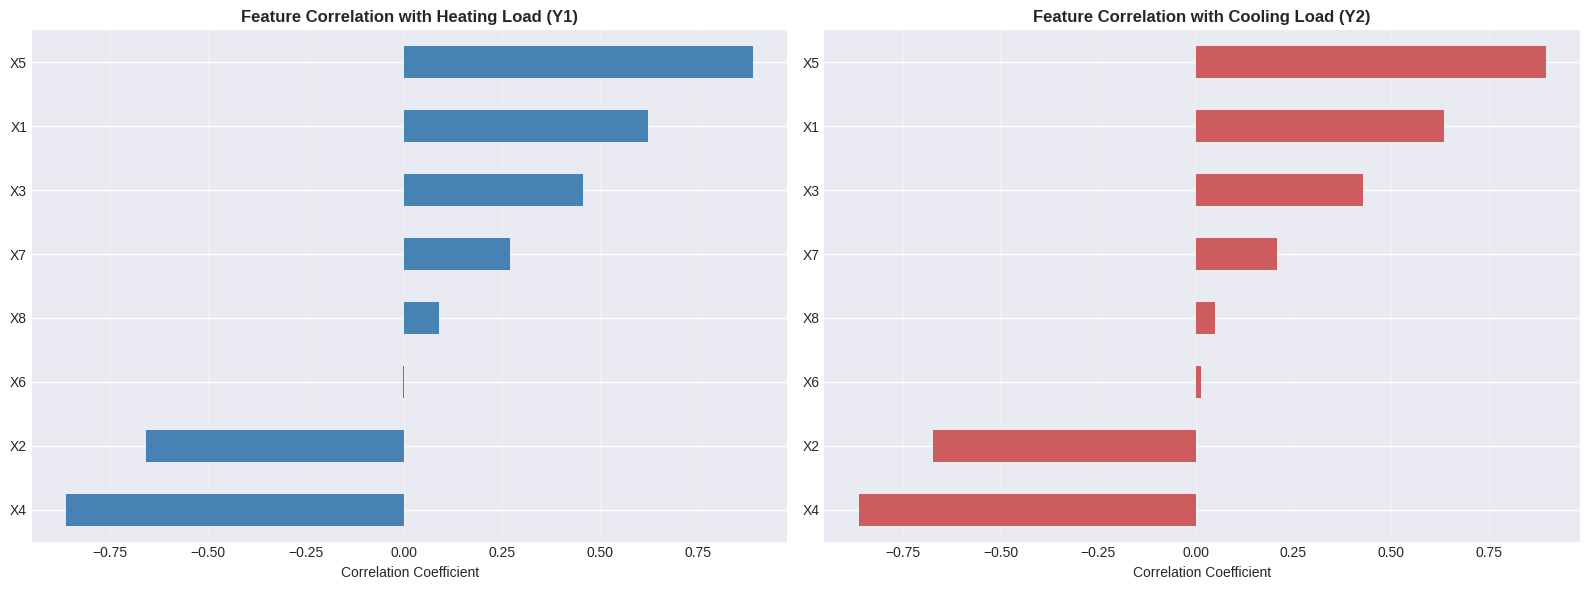

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Drop both Y1 and Y2 from left graph
target_corr_y1 = correlation_matrix['Y1'].drop(['Y1', 'Y2']).sort_values()
target_corr_y1.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Feature Correlation with Heating Load (Y1)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].grid(axis='x', alpha=0.3)

# Drop both Y1 and Y2 from right graph  
target_corr_y2 = correlation_matrix['Y2'].drop(['Y1', 'Y2']).sort_values()
target_corr_y2.plot(kind='barh', ax=axes[1], color='indianred')
axes[1].set_title('Feature Correlation with Cooling Load (Y2)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Statistical Significance Testing

In [31]:
print("Pearson Correlation with p-values:")
print("\nFor Heating Load (Y1):")
for col in df.columns[:-2]:
    corr, p_value = pearsonr(df[col], df['Y1'])
    print(f"{col}: r={corr:.4f}, p-value={p_value:.4e}")

print("\nFor Cooling Load (Y2):")
for col in df.columns[:-2]:
    corr, p_value = pearsonr(df[col], df['Y2'])
    print(f"{col}: r={corr:.4f}, p-value={p_value:.4e}")

Pearson Correlation with p-values:

For Heating Load (Y1):
X1: r=0.6223, p-value=1.5913e-83
X2: r=-0.6581, p-value=1.6869e-96
X3: r=0.4557, p-value=1.2219e-40
X4: r=-0.8618, p-value=4.9149e-228
X5: r=0.8894, p-value=1.1409e-262
X6: r=-0.0026, p-value=9.4295e-01
X7: r=0.2698, p-value=2.7960e-14
X8: r=0.0874, p-value=1.5440e-02

For Cooling Load (Y2):
X1: r=0.6343, p-value=1.0609e-87
X2: r=-0.6730, p-value=2.0052e-102
X3: r=0.4271, p-value=2.1082e-35
X4: r=-0.8625, p-value=7.7320e-229
X5: r=0.8958, p-value=5.8558e-272
X6: r=0.0143, p-value=6.9256e-01
X7: r=0.2075, p-value=6.4569e-09
X8: r=0.0505, p-value=1.6187e-01


---
# Data Analysis

## Univariate Analysis - Numerical Features

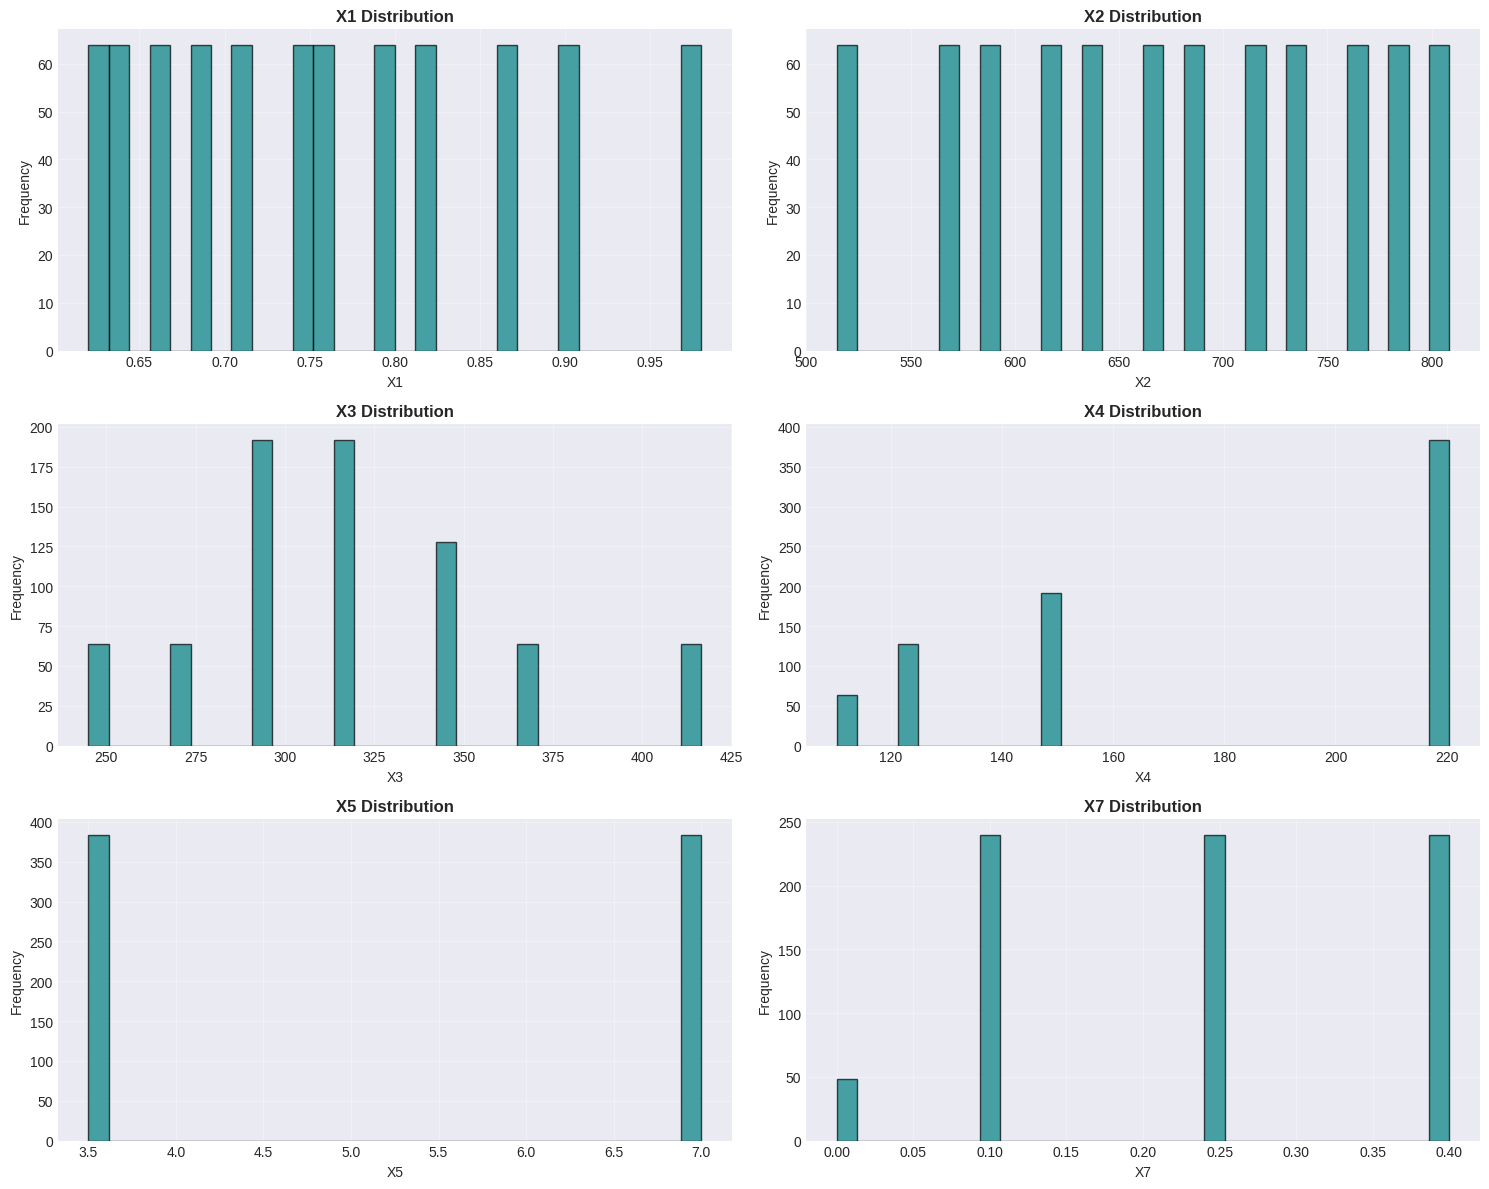

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30, color='teal', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

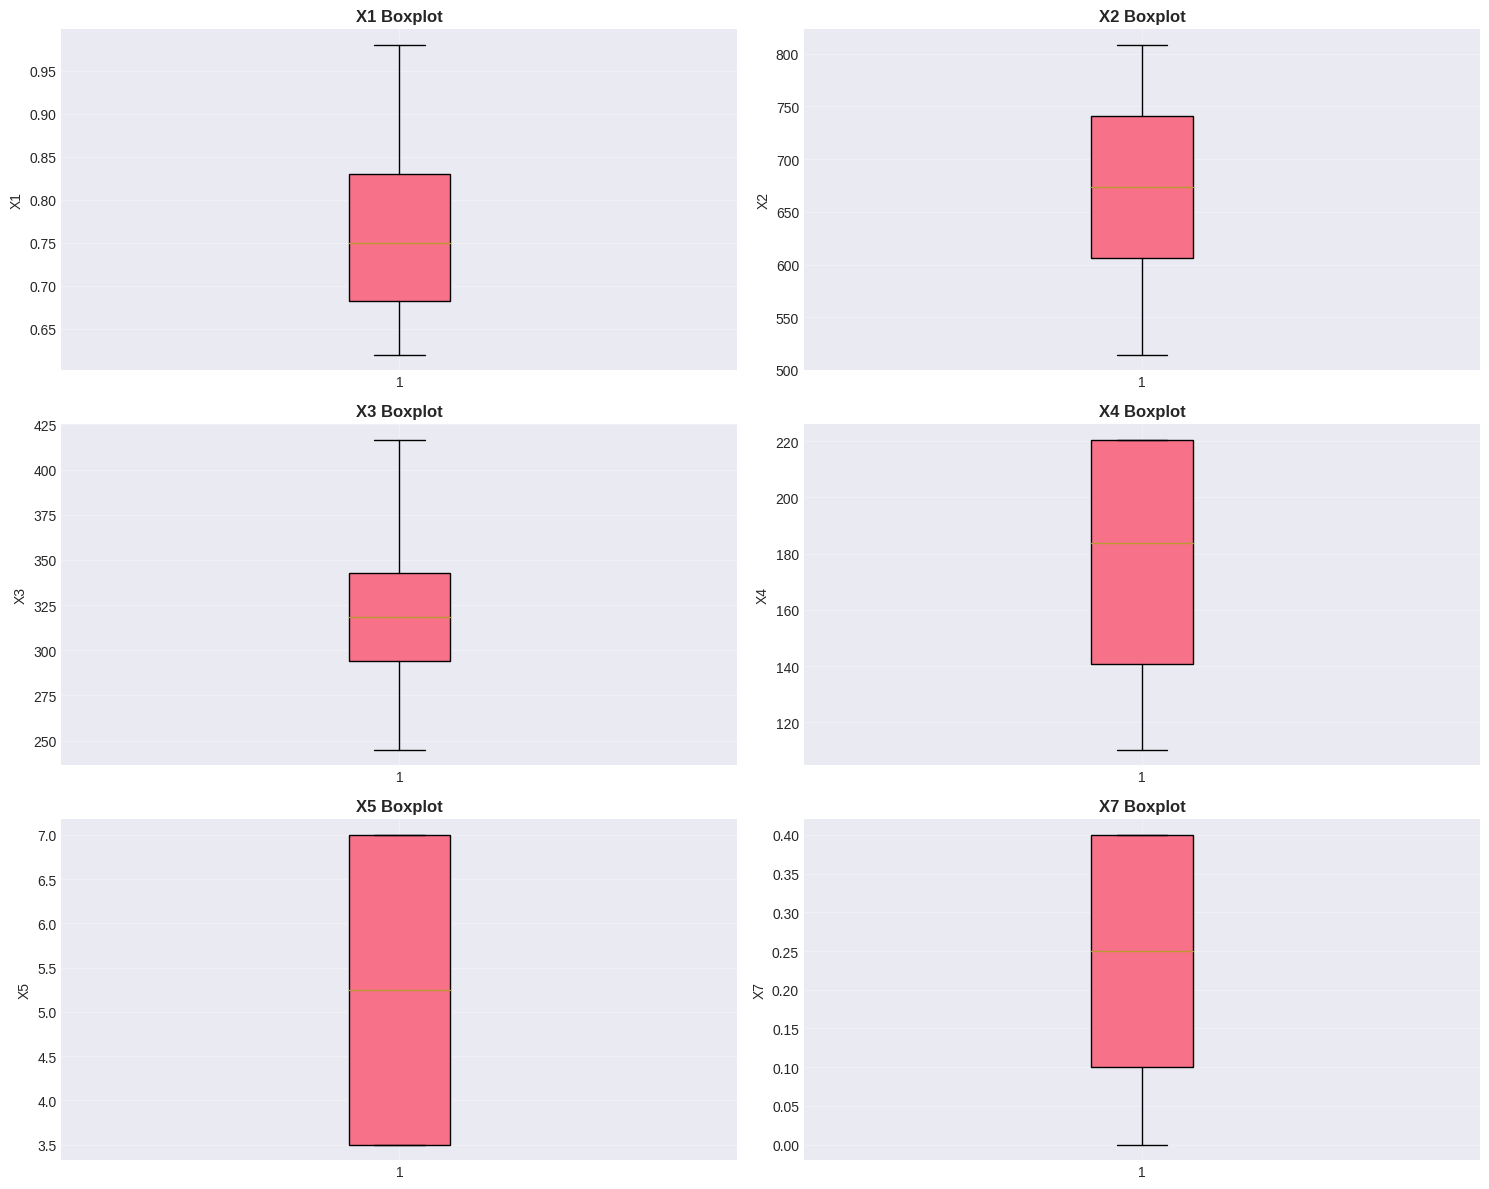

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True)
    axes[idx].set_title(f'{col} Boxplot', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Univariate Analysis - Categorical Features

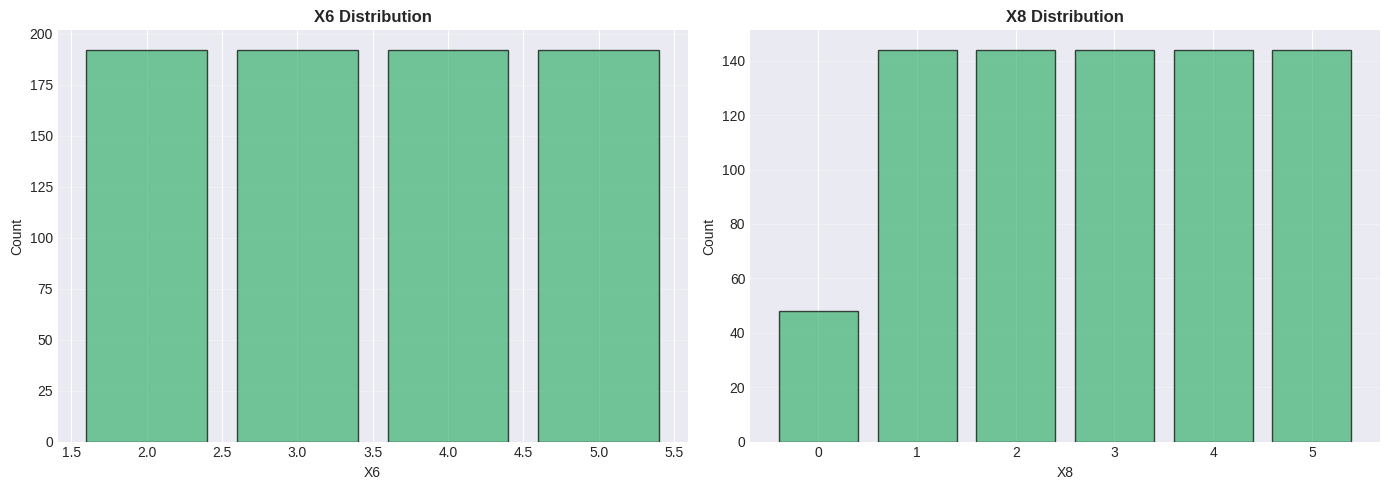

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index, value_counts.values, color='mediumseagreen', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Bivariate Analysis - Features vs Target (Y1)

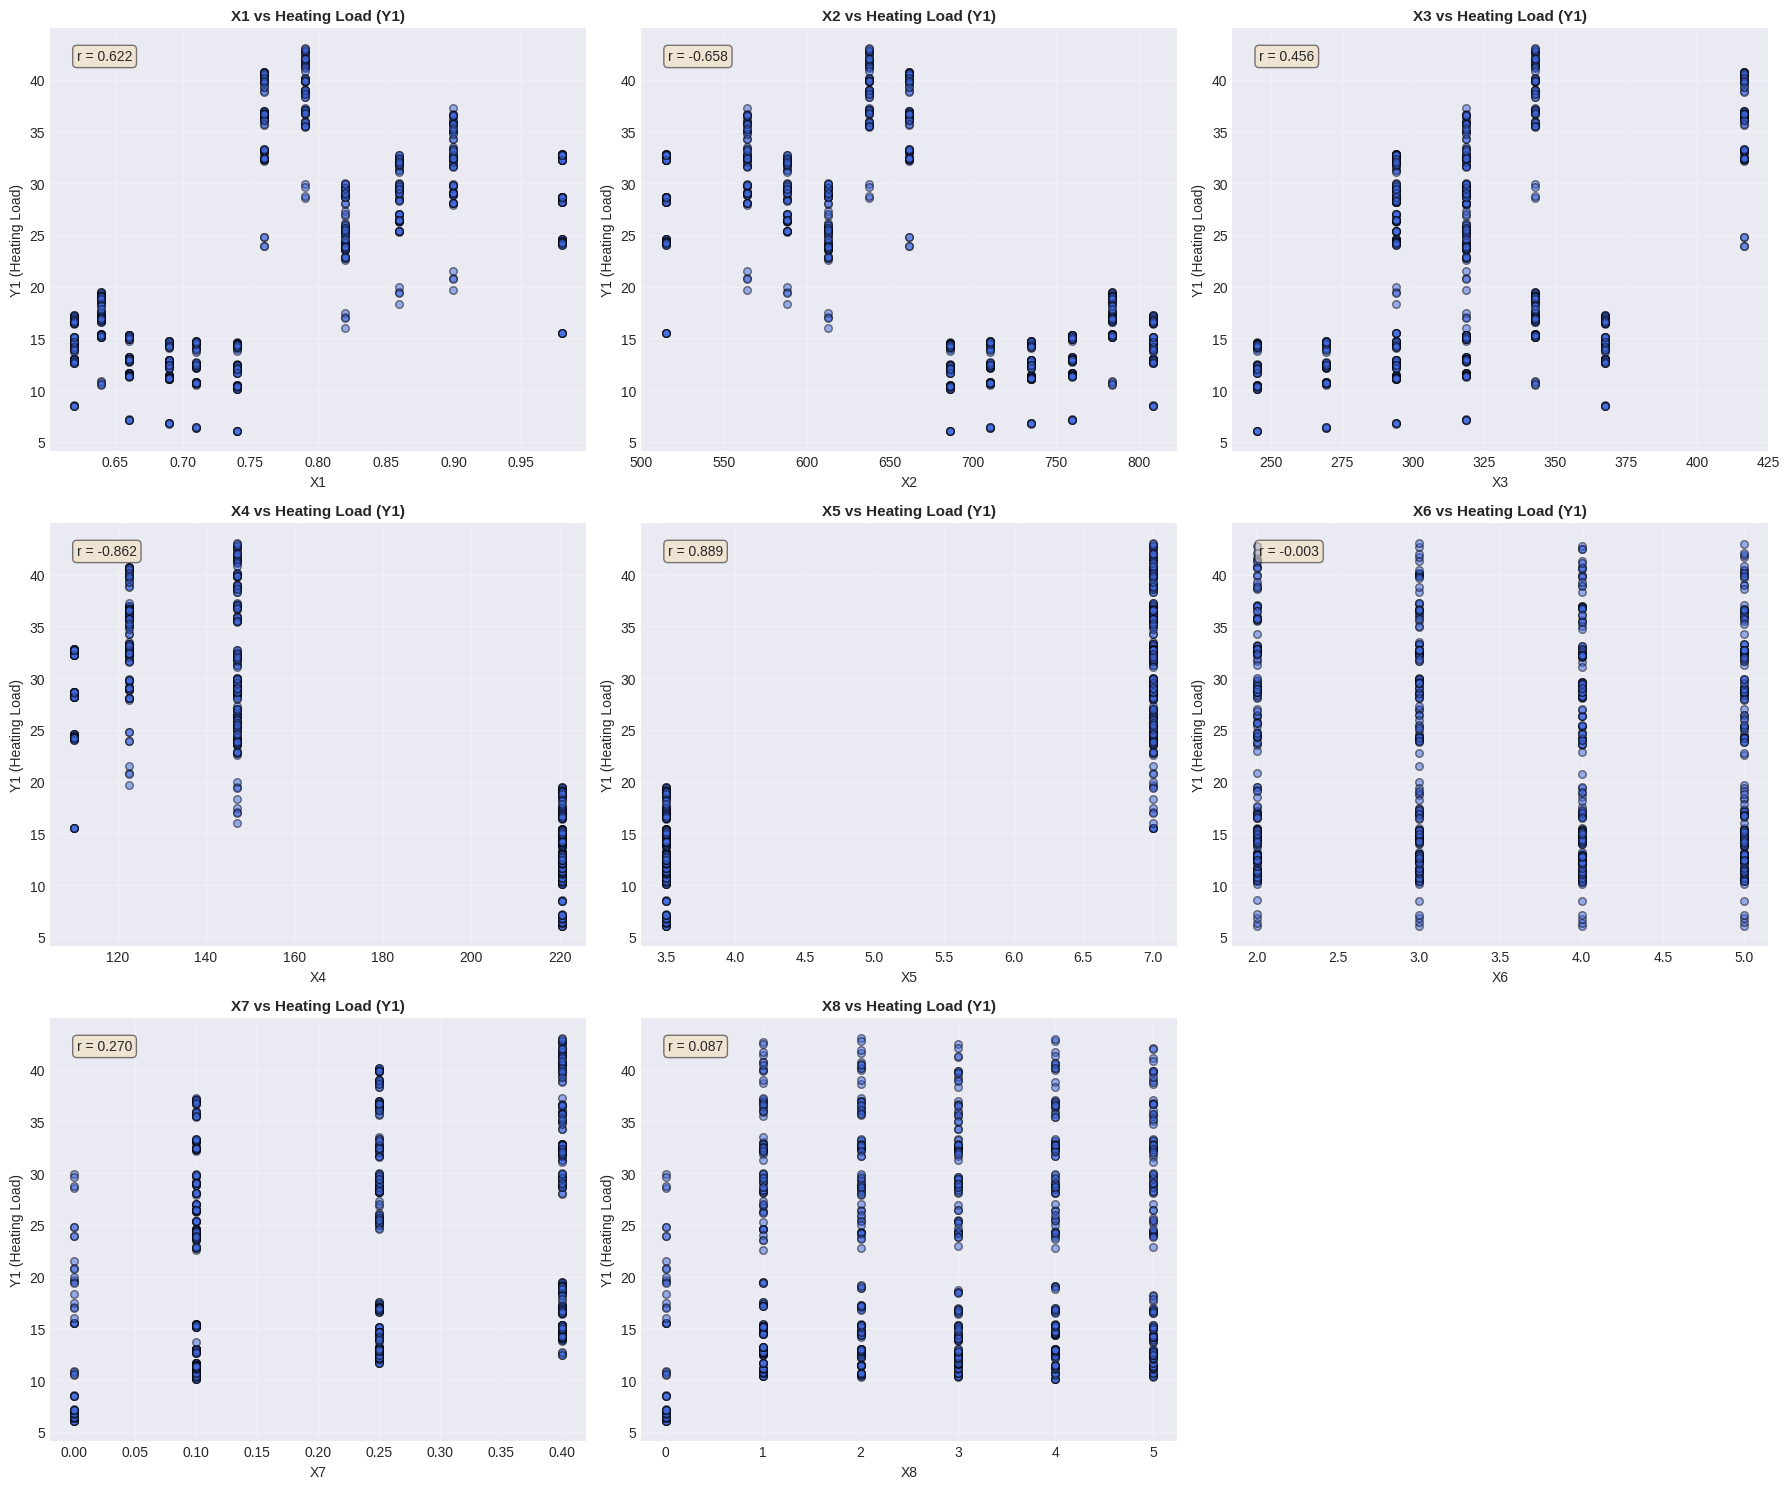

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:-2]):
    axes[idx].scatter(df[col], df['Y1'], alpha=0.5, color='royalblue', edgecolor='black', s=30)
    axes[idx].set_title(f'{col} vs Heating Load (Y1)', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Y1 (Heating Load)')
    axes[idx].grid(alpha=0.3)
    
    corr = df[col].corr(df['Y1'])
    axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', 
                   transform=axes[idx].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   verticalalignment='top')

axes[8].axis('off')

plt.tight_layout()
plt.show()

## Bivariate Analysis - Features vs Target (Y2)

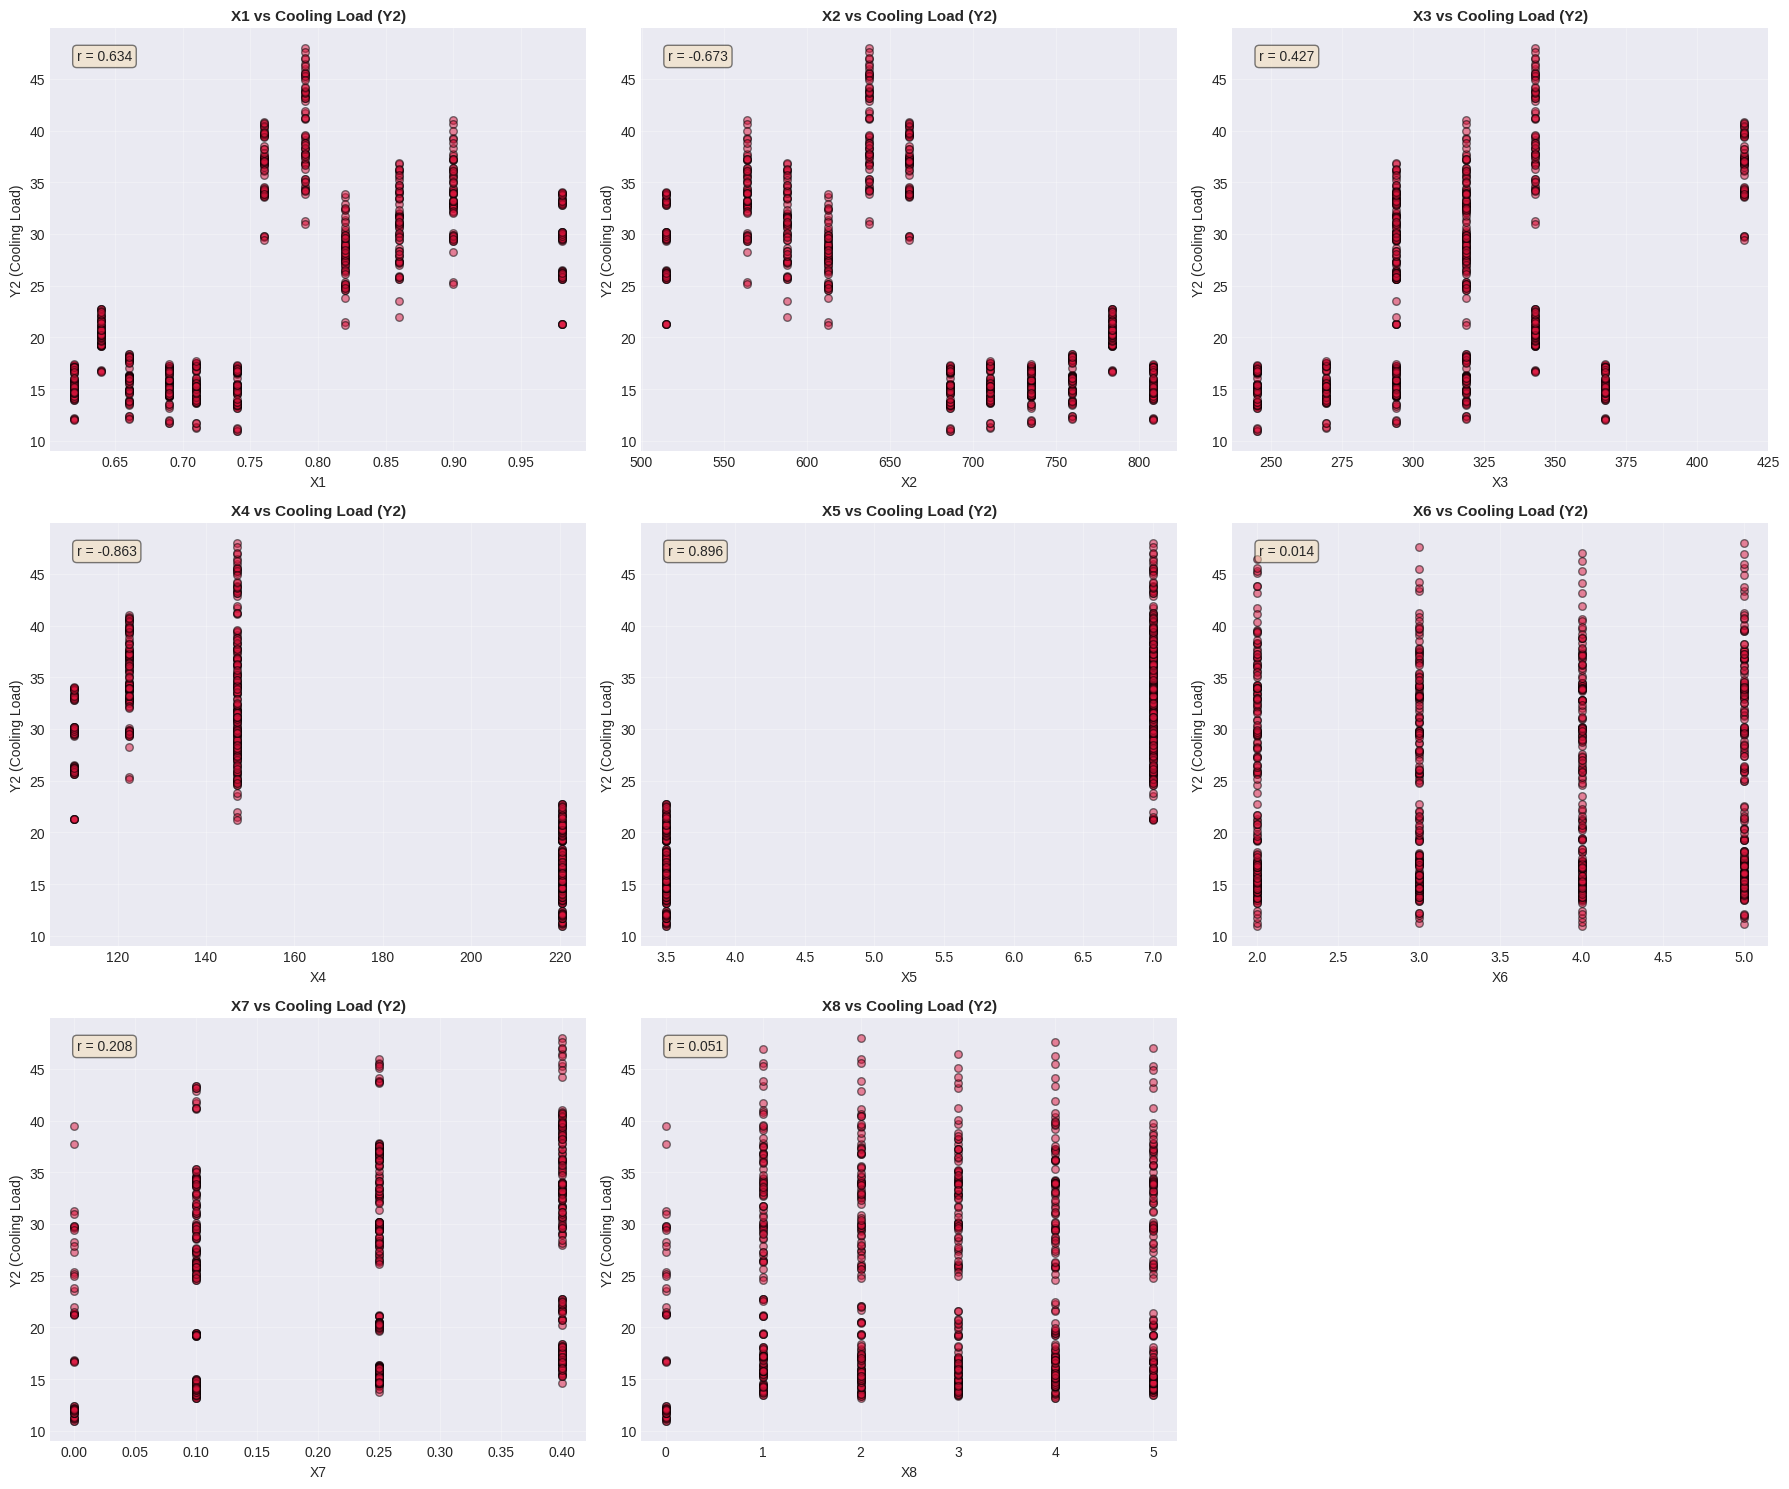

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:-2]):
    axes[idx].scatter(df[col], df['Y2'], alpha=0.5, color='crimson', edgecolor='black', s=30)
    axes[idx].set_title(f'{col} vs Cooling Load (Y2)', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Y2 (Cooling Load)')
    axes[idx].grid(alpha=0.3)
    
    corr = df[col].corr(df['Y2'])
    axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', 
                   transform=axes[idx].transAxes, 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   verticalalignment='top')

axes[8].axis('off')

plt.tight_layout()
plt.show()

## Categorical Feature Analysis with Target

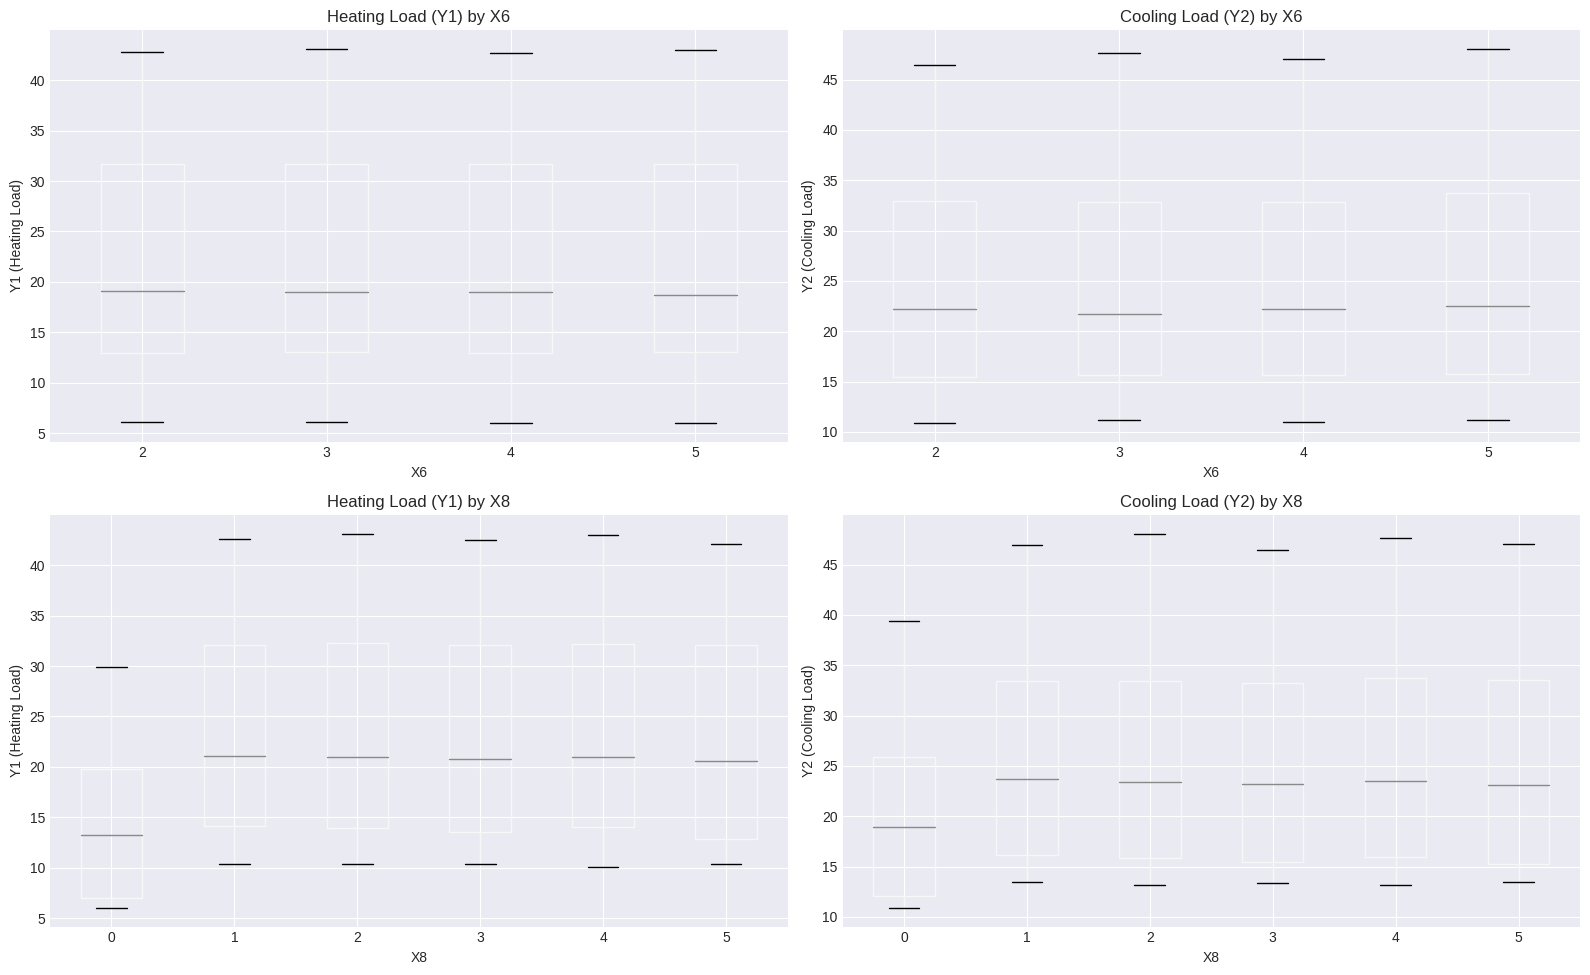

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for idx, col in enumerate(categorical_features):
    df.boxplot(column='Y1', by=col, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Heating Load (Y1) by {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Y1 (Heating Load)')
    plt.sca(axes[idx, 0])
    plt.xticks(rotation=0)
    
    df.boxplot(column='Y2', by=col, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Cooling Load (Y2) by {col}')
    axes[idx, 1].set_xlabel(col)
    axes[idx, 1].set_ylabel('Y2 (Cooling Load)')
    plt.sca(axes[idx, 1])
    plt.xticks(rotation=0)

plt.suptitle('')
plt.tight_layout()
plt.show()

## Outlier Detection

In [40]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Outlier Analysis (IQR Method):")
print("=" * 80)
for col in numerical_features + target_features:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}:")
    print(f"  Number of outliers: {n_outliers}")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print()

Outlier Analysis (IQR Method):
X1:
  Number of outliers: 0
  Bounds: [0.46, 1.05]

X2:
  Number of outliers: 0
  Bounds: [404.25, 943.25]

X3:
  Number of outliers: 0
  Bounds: [220.50, 416.50]

X4:
  Number of outliers: 0
  Bounds: [21.44, 339.94]

X5:
  Number of outliers: 0
  Bounds: [-1.75, 12.25]

X7:
  Number of outliers: 0
  Bounds: [-0.35, 0.85]

Y1:
  Number of outliers: 0
  Bounds: [-15.02, 59.68]

Y2:
  Number of outliers: 0
  Bounds: [-10.65, 59.40]



## Distribution Comparison: Y1 vs Y2

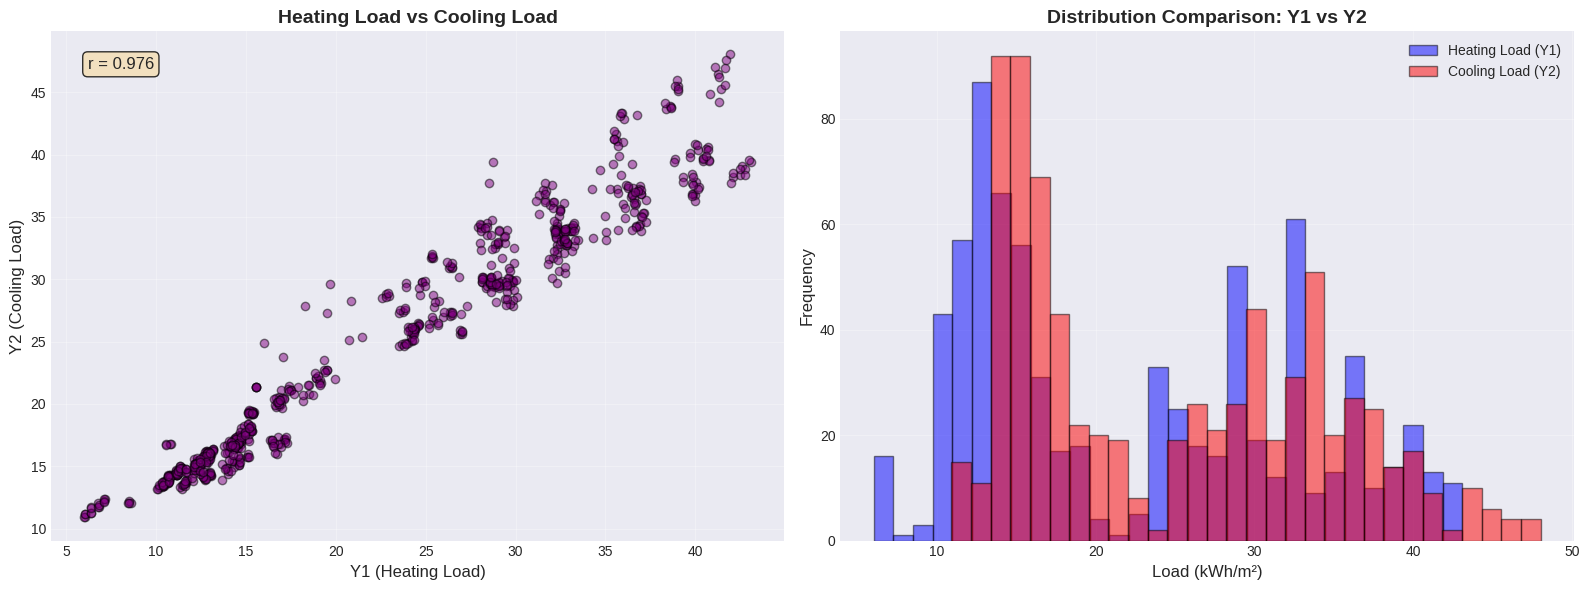

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['Y1'], df['Y2'], alpha=0.5, color='purple', edgecolor='black')
axes[0].set_xlabel('Y1 (Heating Load)', fontsize=12)
axes[0].set_ylabel('Y2 (Cooling Load)', fontsize=12)
axes[0].set_title('Heating Load vs Cooling Load', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
corr_y1_y2 = df['Y1'].corr(df['Y2'])
axes[0].text(0.05, 0.95, f'r = {corr_y1_y2:.3f}', 
             transform=axes[0].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
             verticalalignment='top', fontsize=12)

axes[1].hist(df['Y1'], bins=30, alpha=0.5, label='Heating Load (Y1)', color='blue', edgecolor='black')
axes[1].hist(df['Y2'], bins=30, alpha=0.5, label='Cooling Load (Y2)', color='red', edgecolor='black')
axes[1].set_xlabel('Load (kWh/m²)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution Comparison: Y1 vs Y2', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
# Analysis Conclusions

## Key Findings

### 1. Data Quality
- Dataset contains 768 observations with 8 input features and 2 target variables
- No missing values detected
- All features are numerical (6 continuous, 2 discrete categorical)

### 2. Target Variable Characteristics
- **Heating Load (Y1)** and **Cooling Load (Y2)** are strongly correlated
- Both target variables show multi-modal distributions
- Ranges: Y1 (6.01 - 43.10 kWh/m²), Y2 (10.90 - 48.03 kWh/m²)

### 3. Feature Importance (Based on Correlation)
**For Heating Load (Y1):**
- Strong positive correlation: X1 (Relative Compactness)
- Strong negative correlation: X2 (Surface Area), X4 (Roof Area)
- Moderate correlation: X5 (Overall Height), X7 (Glazing Area)

**For Cooling Load (Y2):**
- Similar patterns to Y1 but with different magnitudes
- X1, X2, X4, and X5 show strong relationships

### 4. Feature Relationships
- X1 (Relative Compactness) and X2 (Surface Area) are highly correlated (multicollinearity)
- X3 (Wall Area) and X4 (Roof Area) show strong negative correlation
- Categorical features (X6: Orientation, X8: Glazing Distribution) show balanced distributions

### 5. Data Patterns
- Most features show non-normal distributions
- Outliers are minimal across features
- Building geometry features (X1-X5) have stronger impact than orientation/glazing features

### 6. Modeling Considerations
- Feature engineering may benefit from interaction terms between geometry features
- Multicollinearity between X1-X2 and X3-X4 may require dimensionality reduction
- Both regression targets (Y1, Y2) can potentially be modeled jointly
- Non-linear models may capture complex interactions better than linear models

### 7. Business Insights
- Building compactness is the primary driver of energy consumption
- Surface area has inverse relationship with energy loads
- Building height and glazing area provide opportunities for energy optimization

### 8. Important Note on Categorical Features

**X6 (Orientation)** and **X8 (Glazing Distribution)** are categorical variables. 
Pearson correlation is not the best measure for these features.

**Key Findings:**
- **X6**: Near-zero correlation confirmed by box plots showing identical means 
  across orientations. Minimal impact on energy loads.
- **X8**: Weak correlation (r≈0.21), but box plots reveal varying ranges 
  suggesting interaction effects with X7 (Glazing Area).

**Modeling Implications:**
- Kept X6 despite low correlation (tree models may find subtle patterns)
- X8 likely has conditional effects depending on X7 value
- CatBoost chosen for native categorical feature handling